# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations

1. There is a strong correlation between Latitude and max temperature in northern and southern hemispheres. The northern hemisphere shows a strong negative correlation which infers that there is decrease in temperature as we move away from the equator and strong positive correlation in southern hemisphere which infers that there is increase in temperature as we move towards the equator.

2. The linear regression analysis shows no meaningful correlation between Latitude and Humidity in both northern and southern hemispheres. 

3. When we take all cities as combined we can infer that cloudiness is widely spread across, so cloudiness and Latitude also does not have significant correlation as Humidity and Latitude. 

4. From the linear regression analysis we can infer that there is no correlation between Wind speed and Latitude in Northern Hemisphere. Whereas there is little or moderate negative correlation between Wind Speed and Latitude in southern hemisphere, which means there is slight decrease in Windspeed when we move towards the equator.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as st
from scipy import stats


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

627


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
# Create lists to store the results
Humidity_list = []
Cloudiness_list = []
Wind_speed_list = []
latitude_list = []
longitude_list = []
country_list = []
city_list = []
date_list =[]
max_temp = []
temperature_list = []

# Inititalize variables for counting city and set
record = 0
set = 1

# Print initial header 
print("Beginning Data Retrieval")
print("..............................")

# Create a loop to go through each city
for city in cities:
    response = requests.get(query_url + city).json()
    record += 1
     # if statement to limit API calls to 50 using time.sleep 
    if record == 51:
            set += 1
            record = 1
            #delay the execution to stay within the limits of the API query 
            time.sleep(1)
    
    try:
        print(f'Processing Record {record} of set {set} | {city}')
        Humidity_list.append(response["main"]["humidity"])
        Cloudiness_list.append(response["clouds"]["all"])
        Wind_speed_list.append(response["wind"]["speed"])
        latitude_list.append(response["coord"]["lat"])
        longitude_list.append(response["coord"]["lon"])
        country_list.append(response["sys"]["country"])
        city_list.append(response["name"])
        date_list.append(response["dt"])
        max_temp.append(response["main"]["temp_max"])
        temperature_list.append(response["main"]["temp"])
        
       
       
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
# Print the footer after the data retrieval        
print("-------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")
    
    
    
    
    
    
    

Beginning Data Retrieval
..............................
Processing Record 1 of set 1 | umzimvubu
City not found. Skipping...
Processing Record 2 of set 1 | geresk
City not found. Skipping...
Processing Record 3 of set 1 | nanortalik
Processing Record 4 of set 1 | avarua
Processing Record 5 of set 1 | ushuaia
Processing Record 6 of set 1 | kamaishi
Processing Record 7 of set 1 | rikitea
Processing Record 8 of set 1 | castro
Processing Record 9 of set 1 | broome
Processing Record 10 of set 1 | port alfred
Processing Record 11 of set 1 | atuona
Processing Record 12 of set 1 | severo-kurilsk
Processing Record 13 of set 1 | busselton
Processing Record 14 of set 1 | nemuro
Processing Record 15 of set 1 | akdepe
Processing Record 16 of set 1 | denpasar
Processing Record 17 of set 1 | las vegas
Processing Record 18 of set 1 | hermanus
Processing Record 19 of set 1 | toliary
City not found. Skipping...
Processing Record 20 of set 1 | padang
Processing Record 21 of set 1 | belushya guba
City not

Processing Record 35 of set 4 | port hedland
Processing Record 36 of set 4 | komsomolskiy
Processing Record 37 of set 4 | bolungarvik
City not found. Skipping...
Processing Record 38 of set 4 | waw
Processing Record 39 of set 4 | mackay
Processing Record 40 of set 4 | port augusta
Processing Record 41 of set 4 | nueva guinea
Processing Record 42 of set 4 | hami
Processing Record 43 of set 4 | cidreira
Processing Record 44 of set 4 | peleduy
Processing Record 45 of set 4 | ballina
Processing Record 46 of set 4 | san vicente
Processing Record 47 of set 4 | egvekinot
Processing Record 48 of set 4 | payakumbuh
Processing Record 49 of set 4 | deputatskiy
Processing Record 50 of set 4 | mecca
Processing Record 1 of set 5 | faanui
Processing Record 2 of set 5 | flinders
Processing Record 3 of set 5 | labuhan
Processing Record 4 of set 5 | iqaluit
Processing Record 5 of set 5 | chiang klang
Processing Record 6 of set 5 | vardo
Processing Record 7 of set 5 | luba
Processing Record 8 of set 5 | 

Processing Record 28 of set 8 | marsabit
Processing Record 29 of set 8 | banda aceh
Processing Record 30 of set 8 | tezu
Processing Record 31 of set 8 | basco
Processing Record 32 of set 8 | coroico
Processing Record 33 of set 8 | exmouth
Processing Record 34 of set 8 | camacupa
Processing Record 35 of set 8 | iztapa
Processing Record 36 of set 8 | guayape
Processing Record 37 of set 8 | baykit
Processing Record 38 of set 8 | los llanos de aridane
Processing Record 39 of set 8 | petropavlovsk-kamchatskiy
Processing Record 40 of set 8 | gazanjyk
Processing Record 41 of set 8 | praya
Processing Record 42 of set 8 | emmett
Processing Record 43 of set 8 | torbay
Processing Record 44 of set 8 | kavali
Processing Record 45 of set 8 | manzhouli
Processing Record 46 of set 8 | biltine
Processing Record 47 of set 8 | okha
Processing Record 48 of set 8 | bongandanga
Processing Record 49 of set 8 | riberalta
Processing Record 50 of set 8 | port lincoln
Processing Record 1 of set 9 | cabra
Process

Processing Record 12 of set 12 | opunake
Processing Record 13 of set 12 | taywarah
Processing Record 14 of set 12 | bitung
Processing Record 15 of set 12 | morro bay
Processing Record 16 of set 12 | pangai
Processing Record 17 of set 12 | aswan
Processing Record 18 of set 12 | pimentel
Processing Record 19 of set 12 | ambovombe
Processing Record 20 of set 12 | sussex
Processing Record 21 of set 12 | vila velha
Processing Record 22 of set 12 | tyrma
Processing Record 23 of set 12 | kizhinga
Processing Record 24 of set 12 | saint-pierre
Processing Record 25 of set 12 | kutum
Processing Record 26 of set 12 | fairbanks
Processing Record 27 of set 12 | richards bay
Processing Record 28 of set 12 | eureka
Processing Record 29 of set 12 | ust-kuyga
Processing Record 30 of set 12 | satitoa
City not found. Skipping...
Processing Record 31 of set 12 | haibowan
City not found. Skipping...
Processing Record 32 of set 12 | kilindoni
Processing Record 33 of set 12 | porto torres
Processing Record 34

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_df = pd.DataFrame({"City" : city_list,
                       "Lat" : latitude_list,
                       "Lng" : longitude_list,
                       "Max Temp" : max_temp,
                       "Humidity" : Humidity_list,
                       "Cloudiness" : Cloudiness_list,
                       "Wind Speed" : Wind_speed_list,
                       "Country" : country_list,
                       "Date" : date_list})

# Convert the date format into normal
city_df["Date"] = pd.to_datetime(city_df["Date"], unit = "s")

# Export the data into CSV
city_df.to_csv("../output_data/cities.csv", index=True, index_label="City Data", header=True)


In [9]:
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nanortalik,60.1432,-45.2371,41.32,85,35,9.71,GL,2022-08-22 23:07:21
1,Avarua,-21.2078,-159.7750,77.05,69,75,12.66,CK,2022-08-22 23:03:33
2,Ushuaia,-54.8000,-68.3000,37.06,65,0,5.75,AR,2022-08-22 23:07:21
3,Kamaishi,39.2667,141.8833,78.35,85,93,10.07,JP,2022-08-22 23:05:22
4,Rikitea,-23.1203,-134.9692,70.48,70,24,14.09,PF,2022-08-22 23:07:22
...,...,...,...,...,...,...,...,...,...
562,Faya,18.3851,42.4509,72.12,35,88,8.70,SA,2022-08-22 23:11:27
563,Dali,25.7000,100.1833,62.04,92,17,1.66,CN,2022-08-22 23:08:55
564,São José da Coroa Grande,-8.8978,-35.1478,73.99,87,99,11.45,BR,2022-08-22 23:11:27
565,Katubao,5.8892,124.8294,81.07,79,100,1.63,PH,2022-08-22 23:11:28


In [10]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,20.341571,20.616254,67.890882,72.511464,58.282187,7.955732
std,33.014148,91.608202,14.046769,19.643720,39.095897,5.554445
min,-54.800000,-179.166700,33.910000,11.000000,0.000000,0.000000
25%,-6.559400,-60.394400,57.245000,63.000000,19.000000,3.690000
50%,22.566700,27.430600,70.340000,77.000000,75.000000,6.580000
75%,49.091300,102.580950,77.990000,87.000000,98.000000,10.940000
max,78.218600,179.316700,104.050000,100.000000,100.000000,33.380000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.
# There are no cities with Humidity greater than 100% as of date 08/21/2022

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

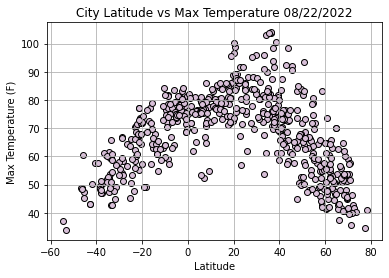

In [29]:
# Create Latitude vs Temperature scatter plot
x_value = city_df["Lat"]
y_value = city_df["Max Temp"]
plt.scatter(x_value, y_value, facecolor = "thistle", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature 08/22/2022")
plt.grid()
plt.savefig("../Images/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()


## Latitude vs. Humidity Plot

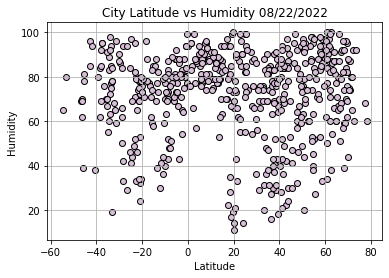

In [30]:
# Create Latitude vs Humidity scatter plot
x_value = city_df["Lat"]
y_value = city_df["Humidity"]
plt.scatter(x_value, y_value, facecolor = "thistle", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs Humidity 08/22/2022")
plt.grid()
plt.savefig("../Images/latitude_vs_Humidity.png", bbox_inches="tight")
plt.show()

From the above scatterplot we can infer that Humidity and Latitude does not have significant correlation.

## Latitude vs. Cloudiness Plot

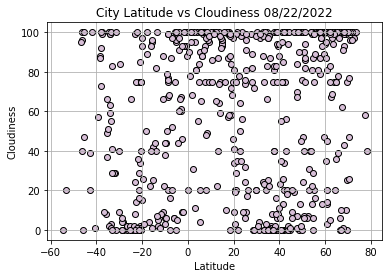

In [31]:
# Create Latitude vs cloudiness scatter plot
x_value = city_df["Lat"]
y_value = city_df["Cloudiness"]
plt.scatter(x_value, y_value, facecolor = "thistle", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs Cloudiness 08/22/2022")
plt.grid()
plt.savefig("../Images/latitude_vs_Cloudiness.png", bbox_inches="tight")
plt.show()

In the above scatter plot cloudiness is widely spread across, so we can infer that cloudiness and Latitude also does not have significant correlation as Humidity and Latitude.

## Latitude vs. Wind Speed Plot

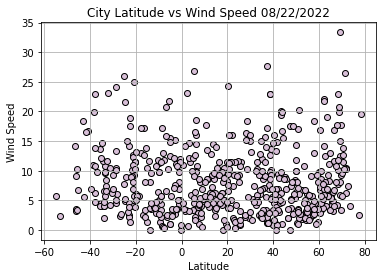

In [32]:
# Create Latitude vs Wind Speed scatter plot
x_value = city_df["Lat"]
y_value = city_df["Wind Speed"]
plt.scatter(x_value, y_value, facecolor = "thistle", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs Wind Speed 08/22/2022")
plt.grid()
plt.savefig("../Images/latitude_vs_Wind Speed.png", bbox_inches="tight")
plt.show()

The scatterplot for wind speed vs Latitude also doesnot show any correlation like humidity and cloudiness.

## Linear Regression

In [15]:
# Create dataframes that hold Northern hemisphere and southern hemisphere data
northern_hemisphere_df = city_df.loc[city_df["Lat"]>=0,:]
southern_hemisphere_df = city_df.loc[city_df["Lat"]<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is : -0.6639


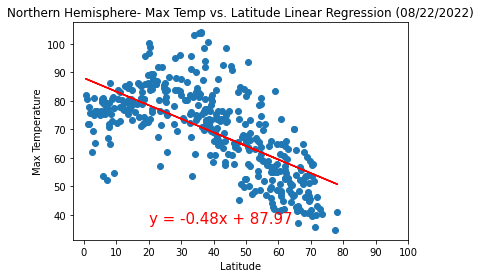

In [33]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("Northern Hemisphere- Max Temp vs. Latitude Linear Regression (08/22/2022)")
print(f"The rvalue is : {round(rvalue,4)}")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (20,37), fontsize=15, color="red")


plt.savefig("../Images/Northern Hemisphere-Max Temp vs Latitude Linear Regression.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is : 0.8077


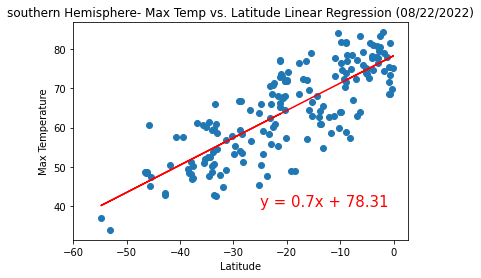

In [34]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")

plt.xticks([0, -10, -20, -30, -40, -50, -60 ])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("southern Hemisphere- Max Temp vs. Latitude Linear Regression (08/22/2022)")
print(f"The r value is : {round(rvalue,4)}")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-25,40), fontsize=15, color="red")


plt.savefig("../Images/southern Hemisphere-Max Temp vs Latitude Linear Regression.png", bbox_inches="tight")
plt.show()

Northern/Southern Hemispheres - Temperature (F) vs. Latitude Linear Regression

The above two scatter plots shows a strong correlation between max temperature (F) and Latitude in both northern and southern hemispheres.
The northern hemisphere displays a negative correlation and southern hemisphere displays a positive correlation.
Looking at this we can infer that in northern hemisphere temperature falls as there is an increase in Latitude and in southern hemisphere temperature increases with latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is : -0.0483


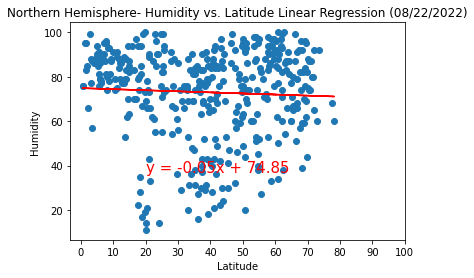

In [35]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ])
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.title("Northern Hemisphere- Humidity vs. Latitude Linear Regression (08/22/2022)")
print(f"The r value is : {round(rvalue,4)}")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (20,37), fontsize=15, color="red")


plt.savefig("../Images/Northern Hemisphere-Humidity vs Latitude Linear Regression.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is : 0.0251


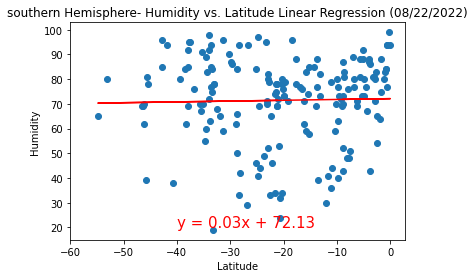

In [36]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")

plt.xticks([0, -10, -20, -30, -40, -50, -60 ])
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.title("southern Hemisphere- Humidity vs. Latitude Linear Regression (08/22/2022)")
print(f"The r value is : {round(rvalue,4)}")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-40,20), fontsize=15, color="red")


plt.savefig("../Images/southern Hemisphere-Humidity vs Latitude Linear Regression.png", bbox_inches="tight")
plt.show()

Northern/Southern Hemispheres - Humidity vs. Latitude Linear Regression

From the above two scatter plots and the r value we can infer that there is no correlation between  Humidity and Latitude in both northern hemisphere and southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is : -0.0399


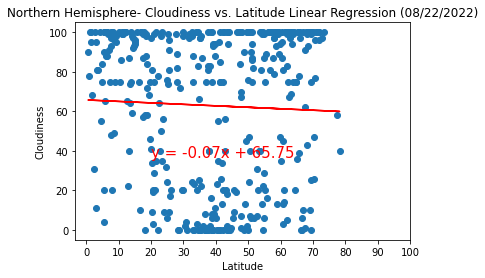

In [37]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ])
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere- Cloudiness vs. Latitude Linear Regression (08/22/2022)")
print(f"The r value is : {round(rvalue,4)}")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (20,37), fontsize=15, color="red")


plt.savefig("../Images/Northern Hemisphere-Cloudiness vs Latitude Linear Regression.png", bbox_inches="tight")
plt.show()

Northern Hemisphere - Cloudiness vs. Latitude Linear Regression

From the above scatter plot we can infer that there is no correlation between cloudiness and Latitude in Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is : 0.1377


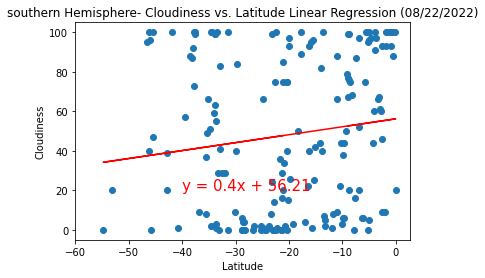

In [38]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")

plt.xticks([0, -10, -20, -30, -40, -50, -60 ])
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.title("southern Hemisphere- Cloudiness vs. Latitude Linear Regression (08/22/2022)")
print(f"The r value is : {round(rvalue,4)}")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-40,20), fontsize=15, color="red")


plt.savefig("../Images/southern Hemisphere-Cloudiness vs Latitude Linear Regression.png", bbox_inches="tight")
plt.show()

Southern Hemisphere - Cloudiness vs. Latitude Linear Regression

From the above scatter plot and the r value we can infer that there is little or moderate positive correlation between Cloudiness and Latitude in southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is : 0.0534


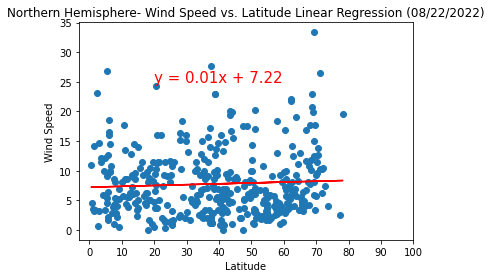

In [39]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ])
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere- Wind Speed vs. Latitude Linear Regression (08/22/2022)")
print(f"The r value is : {round(rvalue,4)}")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (20,25), fontsize=15, color="red")


plt.savefig("../Images/Northern Hemisphere-Wind Speed vs Latitude Linear Regression.png", bbox_inches="tight")
plt.show()

Northern Hemisphere - Wind Speed vs. Latitude Linear Regression

From the above scatter plot we can infer that there is no correlation between Wind speed and Latitude in Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is : -0.1417


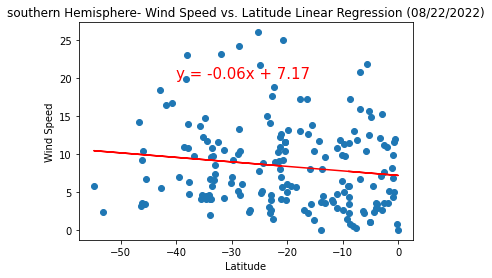

In [40]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")

plt.xticks([0, -10, -20, -30, -40, -50])
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.title("southern Hemisphere- Wind Speed vs. Latitude Linear Regression (08/22/2022)")
print(f"The r value is : {round(rvalue,4)}")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-40,20), fontsize=15, color="red")


plt.savefig("../Images/southern Hemisphere-Wind Speed vs Latitude Linear Regression.png", bbox_inches="tight")
plt.show()

Southern Hemisphere - Wind Speed vs. Latitude Linear Regression

From the above scatter plot and the r value we can infer that there is little or moderate negative correlation between Wind Speed and Latitude in southern hemisphere.